# 25.2.3 Money

## Simple Model

In [1]:
set.seed(1) # for replicability
N.draw = 500000 # number of replicates
x = 500 # number of bills marked in the initial capture
y = 300 # number of bills sampled in the second capture
w = 127 # number of marked bills in the second capture

In [2]:
upper.limit = 1500 # maximum (theoretical) number of bills
bin.width = 50 # for plotting the posterior

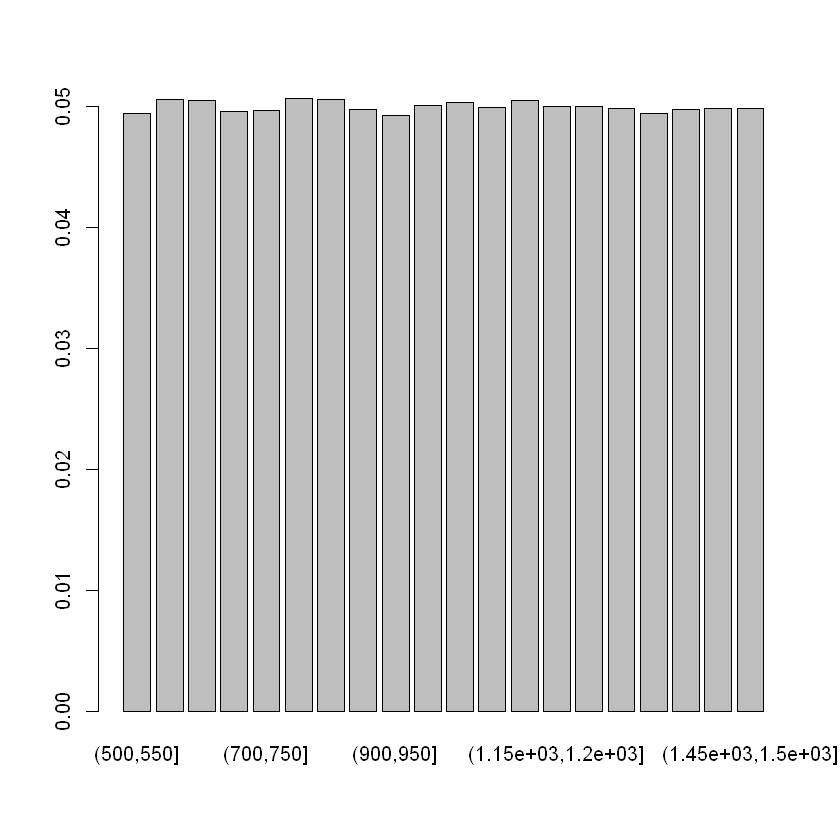

In [3]:
N.bills = sample (x:1500, N.draw, replace=TRUE)
barplot(table(cut(N.bills, seq(x, upper.limit, bin.width))) /
length(N.bills), col = "gray")

In [4]:
pick.bills <- function(N.bills) {
bills <- rep(0:1, c(N.bills - x, x)) # 0 for un-marked
# 1 for marked in the inital capture
sum(sample(bills, y)) # sampling y bills in the 2nd round
}

In [5]:
N.marked <- rep(NA, N.draw)
for(i in 1:N.draw) {
N.marked[i] <- pick.bills(N.bills[i])
}

In [6]:
post.bills <- N.bills[N.marked == w]

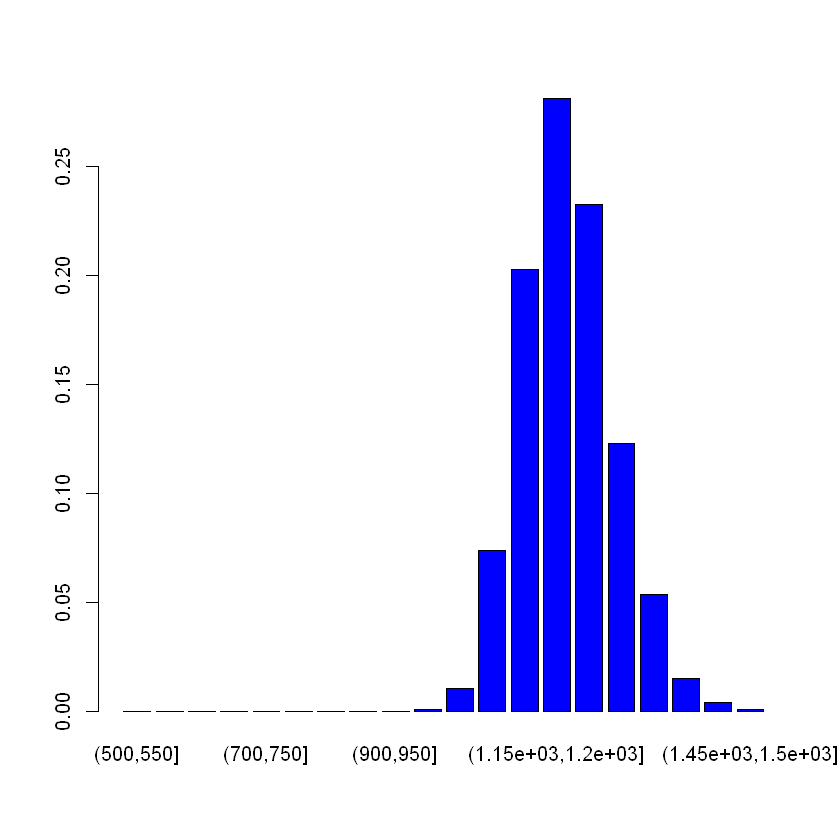

In [7]:
barplot(table(cut(post.bills, seq(x,upper.limit,bin.width))) /
length(post.bills), col = "blue")

In [8]:
length(post.bills)
summary(post.bills)

[1] 4754

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    979    1143    1188    1193    1236    1492 

## Model: Marked Bills are Brittle

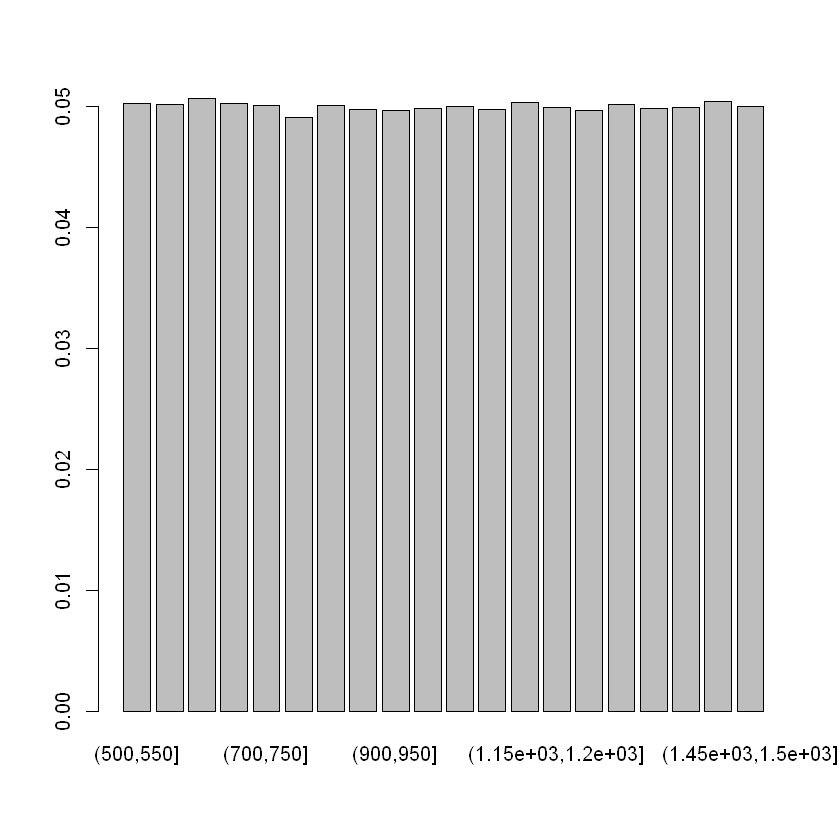

In [9]:
set.seed(10) # for replicability
N.draw = 500000 # number of replicates
x = 500 # number of bills marked in the initial capture
y = 300 # number of bills sampled in the second capture
w = 127 # number of marked bills in the second capture
u = 0.9 # probability that marked bills will be retired
upper.limit = 1500 # maximum (theoretical) number of bills
bin.width = 50 # for plotting the posterior
N.bills = sample (x:1500, N.draw, replace=TRUE)
barplot(table(cut(N.bills, seq(x, upper.limit, bin.width))) /
length(N.bills), col = "gray")

In [10]:
pick.bills <- function(N.bills) {
bills <- rep(0:1, c(N.bills - x, x))
prob.pick <- ifelse(bills == 0, 1.0, u) # brittleness
sum(sample(bills, y, prob = prob.pick))
}

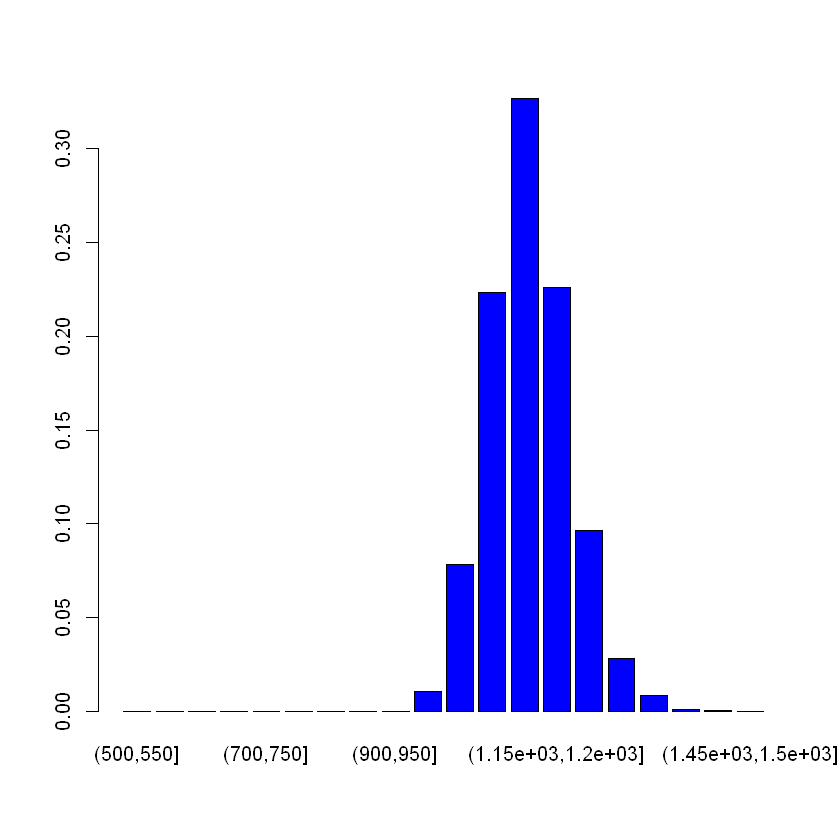

In [12]:
N.marked <- rep(NA, N.draw)
for(i in 1:N.draw) {N.marked[i] <- pick.bills(N.bills[i])
}
# Posterior distribution
post.bills <- N.bills[N.marked == w]
barplot(table(cut(post.bills, seq(x,upper.limit,bin.width))) /
length(post.bills), col = "blue")


In [13]:
length(post.bills)
summary(post.bills)

[1] 4410

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    935    1089    1129    1132    1172    1411 

## Model: Listen to the Banker

In [14]:
set.seed(100) # for replicability
N.draw = 500000 # number of replicates
x = 500 # number of bills marked in the initial capture
y = 300 # number of bills sampled in the second capture
w = 127 # number of marked bills in the sample
u = 0.9 # probability that marked bills will be retired
banker.mean = 1000 # banker guess
upper.limit = 1500 # maximum (theoretical) number of bills
bin.width = 50 # for plotting the posterior

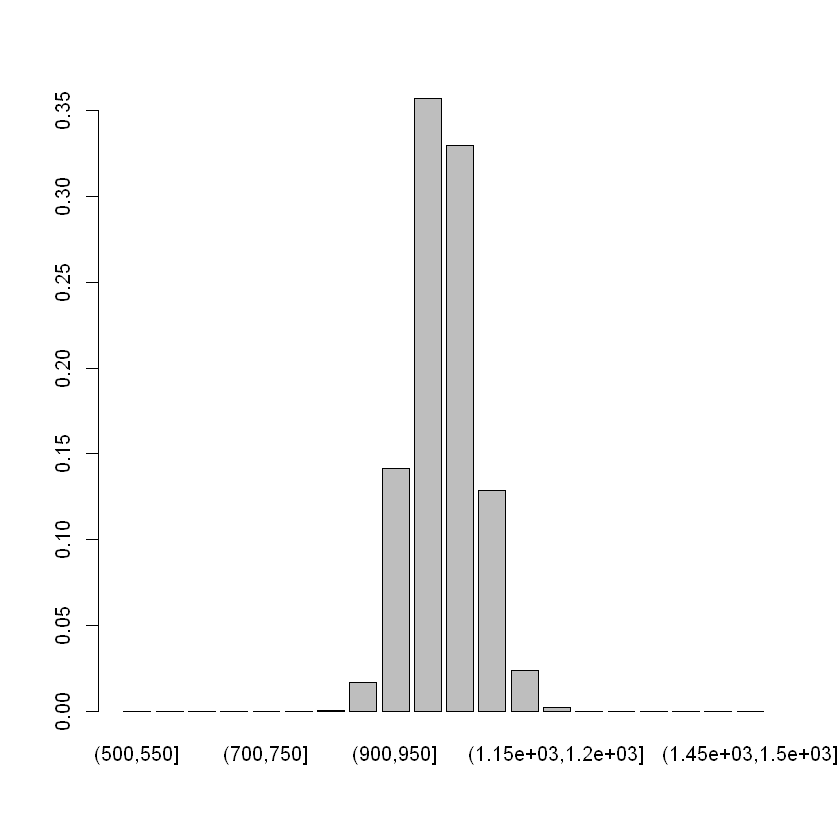

In [16]:
N.bills = rnbinom(N.draw, mu = banker.mean - x, size = w) + x
barplot(table(cut(N.bills, seq(x, upper.limit, bin.width))) /
length(N.bills), col = "gray")
pick.bills <- function(N.bills) {
bills <- rep(0:1, c(N.bills - x, x))
prob.pick <- ifelse(bills == 0, 1.0, u)
sum(sample(bills, y, prob = prob.pick)) # second capture
}

In [ ]:
# N.marked <- rep(NA, N.draw)
# for(i in 1:N.draw) {
# N.marked[i] <- pick.bills(N.bills[i])
# }
# # Posterior
# post.bills <- N.bills[N.marked == w]
# barplot(table(cut(post.bills, seq(x,upper.limit,bin.width))) /
# length(post.bills), col = "blue")

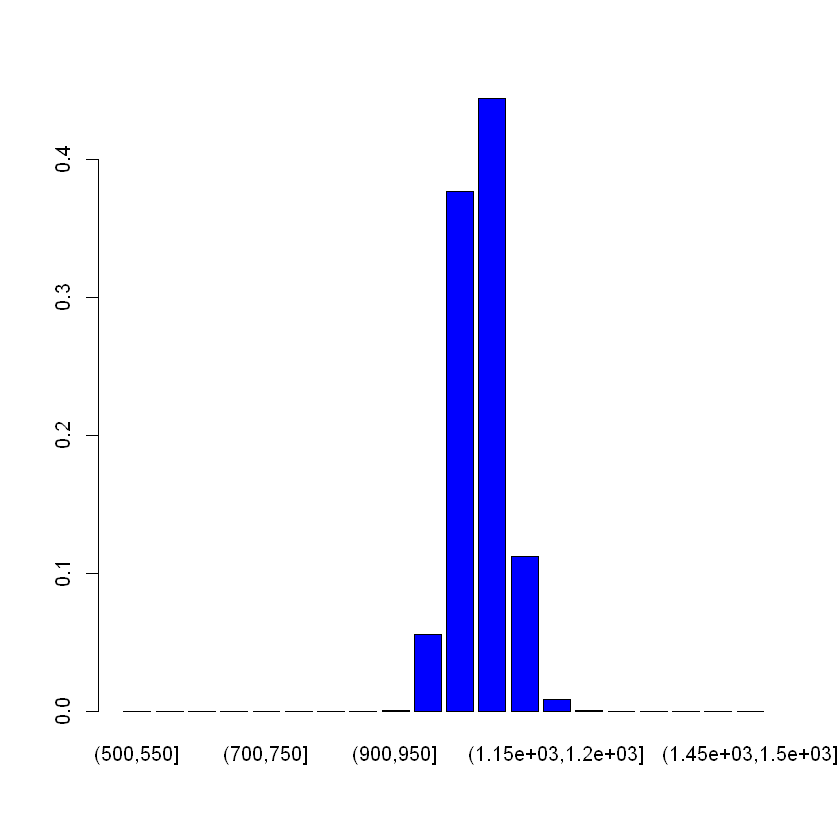

In [17]:
# code above was slow last time, so will try alternative to optimize

N.marked <- sapply(N.bills, pick.bills)

post.bills <- N.bills[N.marked == w]

hist_data <- cut(post.bills, seq(x, upper.limit, bin.width))
bar_data <- table(hist_data) / length(post.bills)

barplot(bar_data, col = "blue")

In [18]:
length(post.bills)
summary(post.bills)

[1] 5258

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    893    1031    1057    1058    1083    1209 